<style>
.text_cell_render {
font-family: Times New Roman, serif;
}
</style>

# <center> DS745: Project Four<center>

<center>John Woodward<center>
    
    

<center>2023-10-31<center>


<div style="page-break-after: always;"></div>

In [1]:
# # Pre-processing -----------------------------------------

# # libraries
# import pandas as pd
# import re

# # Remove specified patterns
# def remove_patterns(text, patterns):
#     return re.sub('|'.join(patterns), '', text)

# # Clean and standardize text
# def preprocess(text, delimiter='|'):
#     brackets_patterns = [r'\[.*?\]', r'\(.*?\)']
#     main_patterns_to_remove = [
#         r'past and past part.', r'archaic 2nd person sing\.', r'past part.',
#         r'adv. & adj\.', r'n\.', r'v\.', r'adj\.', r'adv\.', r'—adj\.',
#         r'—int\.', r'int\.', r'—v\.', r'comb\.', r'attrib\.', r'prep\.',
#         r'coarse slang', r'conj\.', r'var\.', r'colloq.', r'predic\.'
#     ]

#     text = remove_patterns(text, brackets_patterns)
#     main_pattern = '|'.join(main_patterns_to_remove)

#     # Replace main patterns, '*' with '~', and consecutive delimiters
#     def custom_replace(match):
#         return delimiter if match.start() == match.regs[0][0] else match.group()

#     text = re.sub(main_pattern, custom_replace, text, count=1)
#     text = text.replace('*', '~')
#     text = re.sub(f'{re.escape(delimiter)}+', delimiter, text)

#     return text.strip(delimiter)

# # Filter out specified keywords
# def filter_definitions(data):
#     stop_keywords = ['symb', 'abbr', 'prefix', 'suffix']  #, r'see ~', r'var. Of ~']
#     pattern = fr'\b(?:{"|".join(stop_keywords)})\b'
#     is_stop = data['All'].str.contains(pattern, case=False) | (data['All'].str.len() <= 2)
#     return data[~is_stop].copy()

# # Extract words from 'All' column
# def extract_word(data):
#     data['Word'] = data['All'].str.extract(r'^([\w\s-]+)')
#     return data.dropna(subset=['Word']).copy()

# # Extract definitions from 'All' column
# def extract_definitions(row):
#     definition_text = row['All'].rsplit('|', 1)[-1].strip()

#     # Split numerals and filter out sub-definitions
#     #definitions_list = [sub.strip() for definition in re.split(r'\b\d+\s*', definition_text) if definition for sub in definition.split("|") if len(sub.strip()) > 1]
#     return definition_text

# # Load and clean data
# url = "https://raw.githubusercontent.com/sujithps/Dictionary/master/Oxford%20English%20Dictionary.txt"
# data = pd.read_csv(url, header=None, names=["All"], sep='\t').drop_duplicates(subset=['All']).copy()

# data['All'] = data['All'].apply(preprocess)
# data = filter_definitions(data)
# data = extract_word(data)

# # Apply extract_definitions to each row
# data['Definitions'] = data.apply(extract_definitions, axis=1)
# data = data[data['Definitions'].astype(bool)]




In [2]:
# from transformers import BertTokenizer, BertForSequenceClassification
# import torch
# import pandas as pd

# def get_sentiment_info(definitions, 
#                        model=None, 
#                        tokenizer=None,
#                        max_tokens=512):
#     # Use default model and tokenizer if not provided
#     model = model or BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
#     tokenizer = tokenizer or BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

#     # Tokenize definitions with a limit on the number of tokens
#     tokenized_definitions_flat = tokenizer.tokenize(definitions)[:max_tokens]

#     # Convert tokens to tensors if needed
#     input_ids = tokenizer.convert_tokens_to_ids(tokenized_definitions_flat)
#     inputs = {"input_ids": torch.tensor([input_ids])}

#     # Classify sentiment
#     outputs = model(**inputs)
#     logits = outputs.logits

#     # Calculate probabilities, weighted sentiment
#     sentiment_probabilities = torch.softmax(logits, dim=1)
#     weighted_sentiment = round((sentiment_probabilities * torch.arange(1, logits.shape[1] + 1)).sum().item(), 1)
#     return weighted_sentiment


In [3]:
# from concurrent.futures import ThreadPoolExecutor  # multithreading!!
# from tqdm import tqdm  # progress bar
# import string  # A-Z
# import os  # Import os module for cpu_count

# # Set in_reverse to True if you want to run in reverse
# in_reverse = True  # downstairs runs in True reverse

# def process_letter_pair(pair):
#     letter1, letter2 = pair
#     filename = f'sentiment_WORD_{letter1}{letter2}.csv'

#     # Check if the file already exists
#     if os.path.exists(filename):
#         #print(f"\tSkipping {filename} as it already exists.")
#         return

#     #print(f"\tStarting {filename}")

#     batch_data = data[data['Word'].str.startswith(letter1 + letter2)].copy()

#     print(batch_data['Word'].head(1))

#     #print(batch_data['Word'])

#     # Sentiments for 'Word' and 'Definitions' in the batch
#     batch_data['Word_Sentiment'] = batch_data['Word'].apply(lambda word: get_sentiment_info(word)).copy()
#     #batch_data['Defn_Sentiment'] = batch_data['Definitions'].apply(lambda definitions: get_sentiment_info(definitions)).copy()

#     # Write to CSV file
#     batch_data.to_csv(filename, index=False, mode='a', header=not letter1)
#     print(f"Finished {filename}")

# # Using ThreadPoolExecutor for parallel processing with max threads
# max_threads = max(os.cpu_count()-1,1) # allow one thread open

# # Create pairs of letters (A-Z) and (a-z)
# letter_pairs = [(letter1, letter2) 
#                 for letter1 in string.ascii_uppercase 
#                 for letter2 in string.ascii_lowercase]

# # Reverse the iteration order if in_reverse is True
# if in_reverse:
#     letter_pairs = list(reversed(letter_pairs))

# with ThreadPoolExecutor(max_threads) as executor:
#     list(tqdm(executor.map(process_letter_pair, 
#                            letter_pairs), 
#               total=len(letter_pairs), 
#               desc=f'Processing Starting Letter Pairs (Threads: {max_threads}, Reverse: {in_reverse})'))


In [4]:
import os
import glob
import pandas as pd

# Get a list of all CSV files matching the pattern
csv_files = glob.glob('sentiment_WORD_*.csv')

# Combine all CSV files into a single DataFrame
all_data = pd.concat([pd.read_csv(file, 
                                  header=None, 
                                  names=['Word', 'Definitions', 'Word_Sentiment'])#, 'Defn_Sentiment']) 
                      for file in csv_files], ignore_index=True)

# grabbing the data
all_data.sort_values(by='Word_Sentiment', 
                     ascending=True, 
                     inplace=True)


C:\Users\John W\AppData\Local\Temp\ipykernel_10784\896453478.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([pd.read_csv(file,


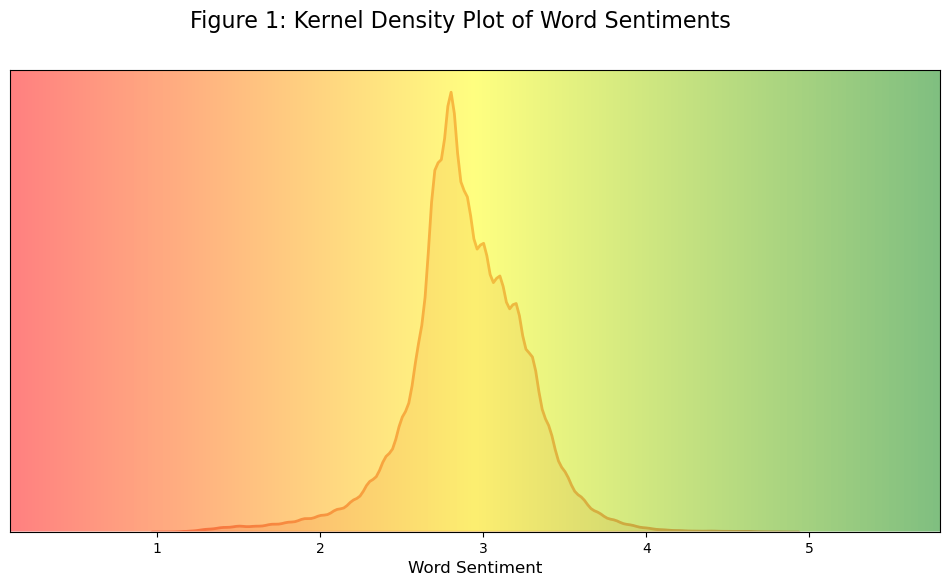

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Gradient colormap red to green
cmap = LinearSegmentedColormap.from_list('red_to_green', ['red', 'yellow', 'green'], N=256)

# Kernel density plot (Seaborn)
plt.figure(figsize=(12, 6))
sns.kdeplot(data=all_data, x='Word_Sentiment', color='lightcoral', linewidth=2, fill=True)

# White background
plt.gca().set_facecolor('white')

# Add shadow below
plt.gca().set_axisbelow(True)

# Gradient background
x = np.linspace(all_data['Word_Sentiment'].min() - 1, all_data['Word_Sentiment'].max() + 1, 1000)
y = np.zeros_like(x)
plt.fill_between(x, y, color='white', alpha=0.5, zorder=2)

# Display color gradient
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.imshow(gradient, aspect='auto', cmap=cmap, extent=[all_data['Word_Sentiment'].min() - 1, all_data['Word_Sentiment'].max() + 1, 0, plt.gca().get_ylim()[1]], alpha=0.5, zorder=1)

# Plot title, remove y-axis labels
num_figure = 1
plt.suptitle(f'Figure {num_figure}: Kernel Density Plot of Word Sentiments', fontsize=16)
plt.xlabel("Word Sentiment", fontsize=12)
plt.ylabel('')
plt.yticks([])

# Set x-axis ticks from 1 to 5
plt.xticks(np.arange(1, 6, 1))

# Remove gridlines+
plt.grid(False)

plt.savefig(f'Figure{num_figure}.png', bbox_inches='tight')

# Show the plot
plt.show()

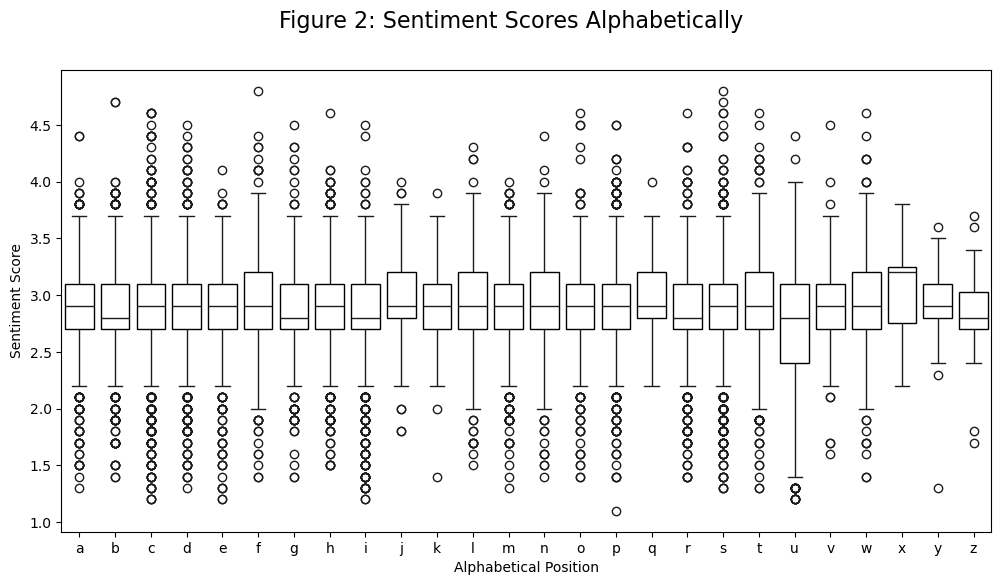

In [20]:
import string
plt.figure(figsize=(12, 6))
sns.boxplot(x=[ord(word[0].lower()) - ord('a') + 1 for word in all_data['Word']], 
            y='Word_Sentiment', data=all_data, 
            hue=[ord(word[0].lower()) - ord('a') + 1 for word in all_data['Word']],
            boxprops=dict(facecolor='none', edgecolor='black'), 
            legend=False)

# Plot alphabetical tick marks
plt.xticks(range(0, 26), list(string.ascii_lowercase))

# Set plot title and labels
num_figure = 2
plt.suptitle(f'Figure {num_figure}: Sentiment Scores Alphabetically', fontsize=16)
plt.xlabel("Alphabetical Position")
plt.ylabel("Sentiment Score")


plt.savefig(f'Figure{num_figure}.png', bbox_inches='tight')

# Show the plot
plt.show()

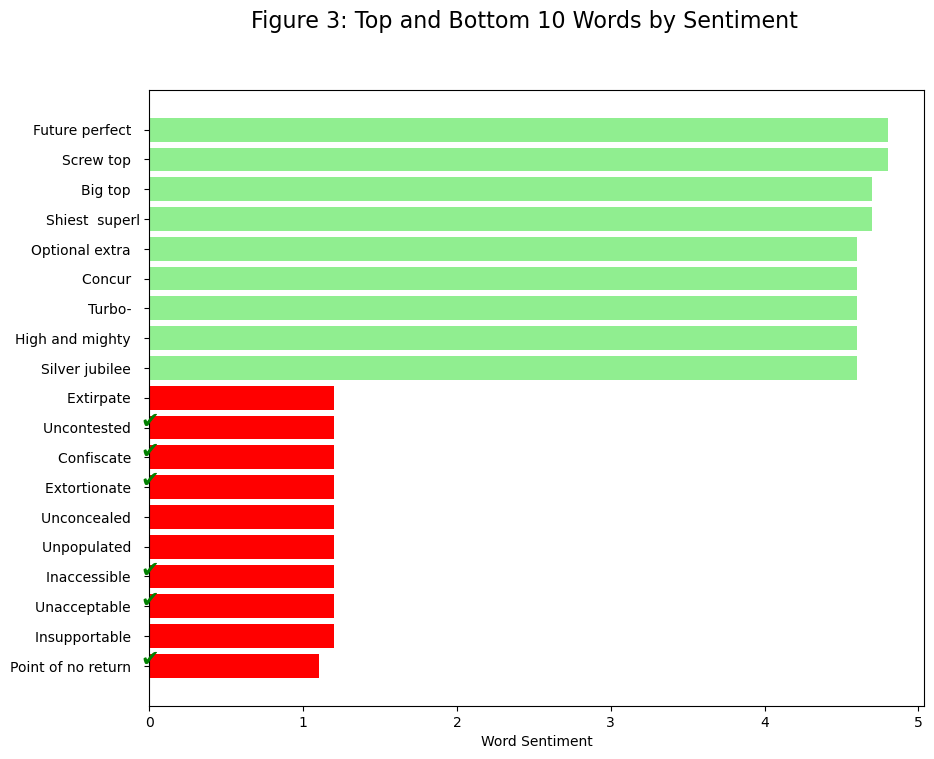

In [21]:
import matplotlib.pyplot as plt
import numpy as np



# Select top and bottom 10 rows
top_bottom_data = pd.concat([all_data.head(10), all_data.tail(10)])

# Define colors based on Word_Sentiment values
colors = np.where(top_bottom_data['Word_Sentiment'] > 3, 'lightgreen', 'red')

# Plot horizontal bar chart with colored bars
plt.figure(figsize=(10, 8))
plt.barh(top_bottom_data['Word'], 
         top_bottom_data['Word_Sentiment'], 
         color=colors)
plt.xlabel('Word Sentiment')

# Annotate checkmarks
plt.annotate('✔', xy=(0, 0), xytext=(0, 0), fontsize=16, color='green', ha='center')
plt.annotate('✔', xy=(0, 0), xytext=(0, 2), fontsize=16, color='green', ha='center')
plt.annotate('✔', xy=(0, 0), xytext=(0, 3), fontsize=16, color='green', ha='center')
plt.annotate('✔', xy=(0, 0), xytext=(0, 6), fontsize=16, color='green', ha='center')
plt.annotate('✔', xy=(0, 0), xytext=(0, 7), fontsize=16, color='green', ha='center')
plt.annotate('✔', xy=(0, 0), xytext=(0, 8), fontsize=16, color='green', ha='center')

num_figure = 3
plt.suptitle(f'Figure {num_figure}: Top and Bottom 10 Words by Sentiment', fontsize=16)

plt.savefig(f'Figure{num_figure}.png', bbox_inches='tight')

plt.show()

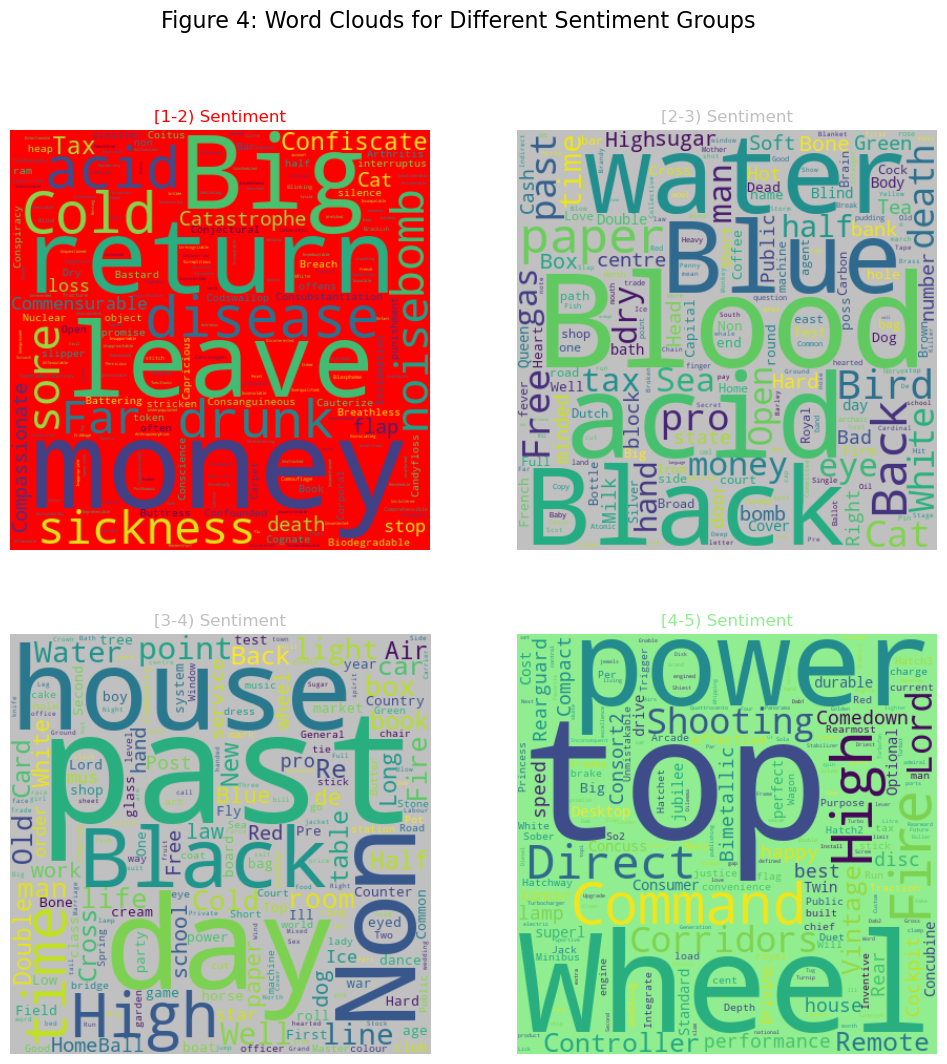

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

# Assuming 'Word_Sentiment' is the column containing sentiment scores
# Define sentiment groups
sentiment_groups = [
    {'label': '[1-2) Sentiment', 'min': 1, 'max': 2, 'color': 'red'},
    {'label': '[2-3) Sentiment', 'min': 2, 'max': 3, 'color': 'silver'},
    {'label': '[3-4) Sentiment', 'min': 3, 'max': 4, 'color': 'silver'},
    {'label': '[4-5) Sentiment', 'min': 4, 'max': 5, 'color': 'lightgreen'},
]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# List of words to exclude
stop_words = ['Usage','See','Self', 'see','slang', 'Slang','pl','Pl']

# Iterate over sentiment groups
for idx, group in enumerate(sentiment_groups):
    # Filter data based on sentiment group
    group_data = all_data[(all_data['Word_Sentiment'] >= group['min']) & (all_data['Word_Sentiment'] < group['max'])]

    # Exclude entire rows where 'Word' contains stop words
    group_data = group_data[~group_data['Word'].str.contains('|'.join(stop_words))]

    if (idx == 0): 
        test = group_data

    # Create WordCloud with specified color
    wordcloud = WordCloud(width=400, height=400, background_color=group['color']).generate(' '.join(group_data['Word']))

    # Plot WordCloud
    axs[idx // 2, idx % 2].imshow(wordcloud, interpolation='bilinear')
    axs[idx // 2, idx % 2].set_title(group['label'], color=group['color'])  # Set title color
    axs[idx // 2, idx % 2].axis('off')

num_figure = 4
plt.suptitle(f'Figure {num_figure}: Word Clouds for Different Sentiment Groups', fontsize=16)

plt.savefig(f'Figure{num_figure}.png', bbox_inches='tight')

plt.show()



-----------------------------------------------

Sources:

1. https://raw.githubusercontent.com/sujithps/Dictionary/master/Oxford%20English%20Dictionary.txt
2. https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment
3. https://www.w3schools.com/python/python_regex.asp

-------------------------------------